# Homework 02:  Working with numbers

**1**. (10 points) 

Normalize the $3 \times 4$ diagonal matrix with diagonal (1, ,2, 3) so all rows have mean 0 and standard deviation 1. The matrix has 0 everywhere not on the diagonal.

In [30]:
import numpy as np

a = np.diag((1,2,3), k = -1)[1:,]
a = a - np.mean(a, axis = 1).reshape(3,1)
a = a / np.std(a, axis = 1).reshape(3,1)
a

array([[ 1.73205081, -0.57735027, -0.57735027, -0.57735027],
       [-0.57735027,  1.73205081, -0.57735027, -0.57735027],
       [-0.57735027, -0.57735027,  1.73205081, -0.57735027]])

**2**. (10 points) 

A fixed point of a funciton is a value that remains the same when the funciton is applied to it, that is $f(x) = x$. Write a function that finds the fixed poitn of another function $f$ given an intiial value $x_0$. For example, if

$$f(x) \rightarrow \sqrt{x}$$

and 

$x_0$ is any positive real number, then the function should return 1 since

$$\sqrt{1} = 1$$

Not all funcitons have a fixed point - if it taakes over 1,000 iterations, the fucntion shold return None.

- Use the function signature `fixed_point(f, x0, max_iter=1000)`. 
- Test with `fixed_point(np.sqrt, 10)`.

In [31]:
def fixed_point(f, x0, max_iter=1000):
    for i in range(max_iter):
        if f(x0) == x0:
            return x0
        else:
            x0 = f(x0)
    return None

fixed_point(np.sqrt, 10)

1.0

**3**. (10 points) 

Use `np.fromfunction` to construc the following matrix

```python
array([[5, 0, 0, 0, 5],
       [0, 4, 0, 4, 0],
       [0, 0, 3, 0, 0],
       [0, 2, 0, 2, 0],
       [1, 0, 0, 0, 1]])
```

In [35]:
np.fromfunction(lambda i, j: np.where((i-j)*(i+j-4)==0, 5-j, 0), [5,5])

array([[5., 0., 0., 0., 1.],
       [0., 4., 0., 2., 0.],
       [0., 0., 3., 0., 0.],
       [0., 4., 0., 2., 0.],
       [5., 0., 0., 0., 1.]])

**4**. (15 points)

Simulate $n$ coin toss experiments, in which you toss a coin $k$ times for each experiment. Find the maximum run length of heads (e.g. the sequence `T,T,H,H,H,T,H,H` has a maximum run length of 3 heads in each experiment.  What is the most common maximum run length?

Let $n$ = 10,000 and $k=100$.

In [40]:
def coin_toss(k=100):
    toss = np.random.rand(100)
    for r in toss


array([ True,  True,  True, False, False, False,  True, False, False,
       False, False,  True, False,  True,  True,  True,  True, False,
        True, False,  True,  True, False,  True, False, False, False,
       False, False,  True,  True, False, False,  True,  True, False,
        True, False,  True, False, False, False,  True,  True, False,
        True, False,  True, False,  True, False,  True,  True,  True,
       False, False,  True,  True, False, False, False,  True, False,
        True, False,  True,  True,  True, False,  True, False,  True,
        True, False, False, False,  True,  True, False, False, False,
       False,  True, False,  True,  True, False, False, False,  True,
        True, False, False, False,  True,  True,  True,  True,  True,
        True])

**5**. (15 points)

Wikipedia gives this algorithm for finding prime numbers

To find all the prime numbers less than or equal to a given integer n by Eratosthenes' method:

- Create a list of consecutive integers from 2 through n: (2, 3, 4, ..., n).
- Initially, let p equal 2, the smallest prime number.
- Enumerate the multiples of p by counting to n from 2p in increments of p, and mark them in the list (these will be 2p, 3p, 4p, ...; the p itself should not be marked).
- Find the first number greater than p in the list that is not marked. If there was no such number, stop. Otherwise, let p now equal this new number (which is the next prime), and repeat from step 3.
- When the algorithm terminates, the numbers remaining not marked in the list are all the primes below n.

Find all primes less than 1,000 using this method.

- You may use `numpy` and do not have to follow the algorithm exactly if you can achieve the same results.

**6**. (40 points)

Write code to generate a plot similar to those shown below using the explanation for generation of 1D Cellular Automata found [here](http://mathworld.wolfram.com/ElementaryCellularAutomaton.html). You should only need to use standard Python, `numpy` and `matplotllib`.

![automata](http://mathworld.wolfram.com/images/eps-gif/ElementaryCA_850.gif)



The input to the function making the plots should be a simple list of rules

```python
rules = [30, 54, 60, 62, 90, 94, 102, 110, 122, 126, 
         150, 158, 182, 188, 190, 220, 222, 250]
make_plots(rules, niter, ncols)
```

You may, of course, write other helper functions to keep your code modular.

In [94]:
import numpy as np
import matplotlib.pyplot as plt

def generate(rule, current):
    rule_code = []
    for i in range(7, -1, -1):
        if 2**i <= rule:
            rule_code.append(1)
            rule -= 2**i
        else:
            rule_code.append(0)
    rule_code = np.array(rule_code[::-1])
    new = np.zeros(current.shape[0], 'int')
    for i, j, k, s in zip(current[:-2], current[1:-1], current[2:], range(current.shape[0]-2)):
        new[s+1] = rule_code[i*2**2+j*2+k]    
    return new



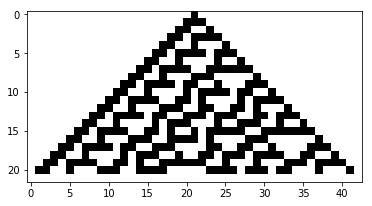

In [98]:
def cellur(rule, gen=20):
    cells = np.zeros((gen+2, 2*gen+3), 'int')
    cells[0,gen+1] = 1
    for i in range(gen):
        cells[i+1,] = generate(rule, cells[i,])
    return cells

test = cellur(30)
plt.imshow(test, cmap = 'Greys')
plt.show()